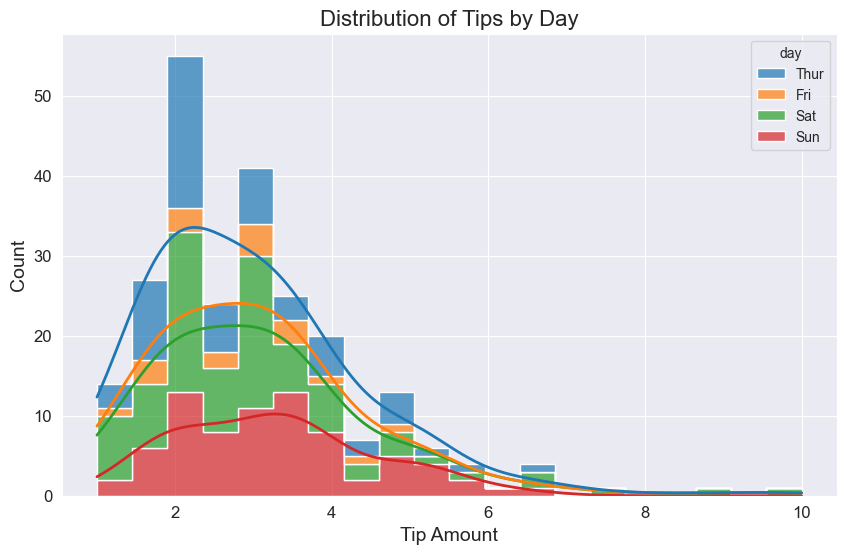

In [57]:
# 예제 1: 요일별 팁(tip) 분포 비교하기
#
# 문제 설명
# tips 데이터셋을 불러와서,
# 요일(day)별 팁(tip)의 분포를 시각화하고 비교해보자.
# Seaborn의 distplot 또는 histplot 함수를 사용한다.
#
# # 1. tips 데이터셋 불러오기
# tips = sns.load_dataset("tips")
# print(tips.head())

import seaborn as sns
import matplotlib.pyplot as plt
import statsmodels.api as sm

# 1. tips 데이터셋 불러오기
tips = sns.load_dataset("tips")

# 2. 요일별 팁 분포 시각화
plt.figure(figsize=(10, 6))
sns.histplot(
    data=tips, x="tip", hue="day", kde=True, bins=20, element="step", multiple="stack",
    common_norm=False, alpha=0.7, line_kws={"linewidth": 2}
)

# 3. 그래프 제목 및 축 레이블 설정
plt.title("Distribution of Tips by Day", fontsize=16)
plt.xlabel("Tip Amount", fontsize=14)
plt.ylabel("Count", fontsize=14)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)

# 4. 그래프 표시
plt.show()

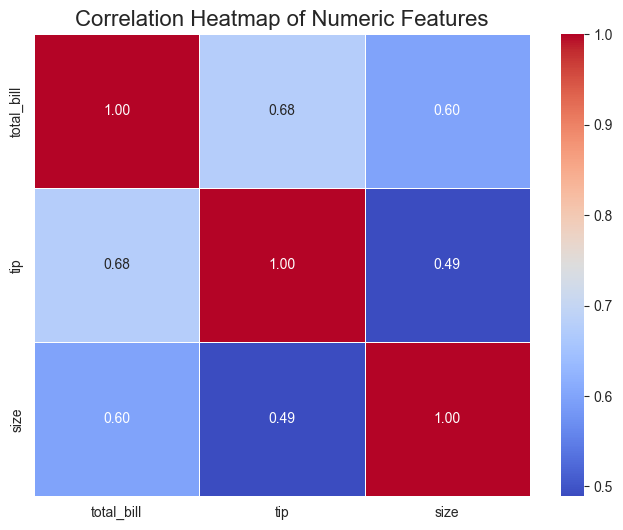

In [58]:
# 예제 2: 숫자형 변수 간 상관관계 히트맵 그리기
#
# 문제 설명
# tips 데이터셋에서 숫자형 열(예: total_bill, tip, size)을 골라
# 상관계수를 구하고 히트맵으로 시각화한다.
# Seaborn의 heatmap 함수를 사용한다.

# tips 데이터셋 불러오기
tips = sns.load_dataset("tips")

# 숫자형 변수만 선택
numeric_tips = tips.select_dtypes(include=['number'])

# 상관계수 계산
corr_matrix = numeric_tips.corr()

# 상관관계 히트맵 시각화
plt.figure(figsize=(8, 6))
sns.heatmap(corr_matrix, annot=True, cmap="coolwarm", fmt=".2f", linewidths=0.5)

# 그래프 제목 설정
plt.title("Correlation Heatmap of Numeric Features", fontsize=16)
plt.show()

                            OLS Regression Results                            
Dep. Variable:                    tip   R-squared:                       0.468
Model:                            OLS   Adj. R-squared:                  0.463
Method:                 Least Squares   F-statistic:                     105.9
Date:                Fri, 28 Feb 2025   Prob (F-statistic):           9.67e-34
Time:                        15:34:36   Log-Likelihood:                -347.99
No. Observations:                 244   AIC:                             702.0
Df Residuals:                     241   BIC:                             712.5
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.6689      0.194      3.455      0.0

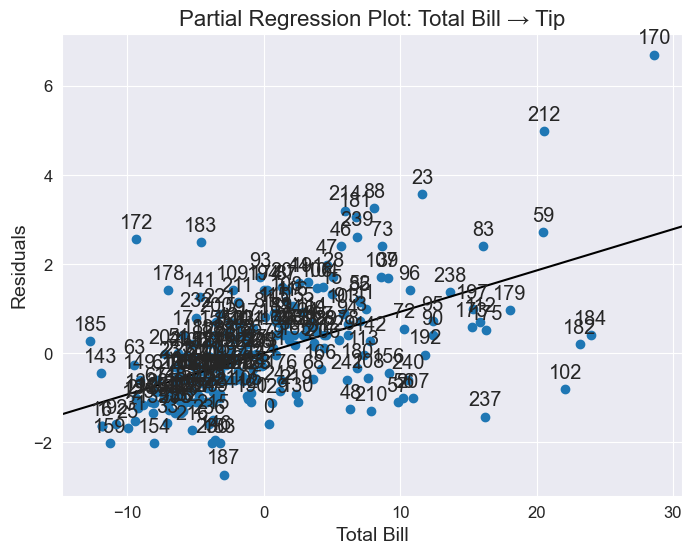

In [59]:
# 예제 3: 회귀 모델 적합 및 부분 회귀 플롯(Partial Regression Plot) 확인하기
# 문제 설명
# tips 데이터셋에서 종속 변수를 tip으로 하고,
# 독립 변수로 total_bill과 size를 사용하여 간단한 선형 회귀 모델을 적합한다.
# statsmodels의 OLS 회귀를 사용한 뒤,
# 부분 회귀 플롯으로 total_bill이 tip에 미치는 순수한 영향력을 시각화해본다.

# 1. 데이터 불러오기
tips = sns.load_dataset("tips")

# 2. 독립 변수(X)와 종속 변수(y) 설정
X = tips[["total_bill", "size"]]  # 독립 변수
y = tips["tip"]  # 종속 변수

# 3. 상수항 추가 (절편 포함)
X = sm.add_constant(X)

# 4. OLS 회귀 모델 적합
model = sm.OLS(y, X).fit()

# 5. 회귀 분석 결과 출력
print(model.summary())

# 6. 부분 회귀 플롯 (total_bill의 순수한 영향력 확인)
fig, ax = plt.subplots(figsize=(8, 6))

# 기존 코드 그대로 사용
sm.graphics.plot_partregress("tip", "total_bill", ["size"], data=tips, ax=ax)

# 7. 그래프 제목 설정
plt.title("Partial Regression Plot: Total Bill → Tip", fontsize=16)
plt.xlabel("Total Bill", fontsize=14)
plt.ylabel("Residuals", fontsize=14)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)

# 8. 그래프 표시
plt.show()